importing the libraries

In [1]:
import numpy as np 
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import seaborn as sns
sns.set_theme(style="darkgrid")

In [2]:
df = pd.read_csv(r'C:\Users\USER\Videos\COURSES\Data science\35 - Advanced Statistical Methods Practical Example Linear Regression\226 - 1.04.Real-life-example.csv')

In [3]:
df.head()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,320
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,Sprinter 212
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,S 500
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,Q7
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,Rav 4


Descriptive statistics of variables


In [4]:
df.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
count,4345,4173.000000,4345,4345.000000,4195.000000,4345,4345,4345.000000,4345
unique,7,NaN,6,NaN,NaN,4,2,NaN,312
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN,E-Class
freq,936,NaN,1649,NaN,NaN,2019,3947,NaN,199
mean,NaN,19418.746935,NaN,161.237284,2.790734,NaN,NaN,2006.550058,NaN
std,NaN,25584.242620,NaN,105.705797,5.066437,NaN,NaN,6.719097,NaN
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000,NaN
25%,NaN,6999.000000,NaN,86.000000,1.800000,NaN,NaN,2003.000000,NaN
50%,NaN,11500.000000,NaN,155.000000,2.200000,NaN,NaN,2008.000000,NaN
75%,NaN,21700.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000,NaN


In [5]:
# model has no significant trait since it has about 3947 yes observations in 4345 total
df1=df.drop(['Model'],axis=1)

Dealing with missing values

In [6]:
#we have 172 price and 150 EngineV missing values
# we can drop them since the data is very few
df1.isnull().sum()

Brand             0
Price           172
Body              0
Mileage           0
EngineV         150
Engine Type       0
Registration      0
Year              0
dtype: int64

Exploring probability distribution function

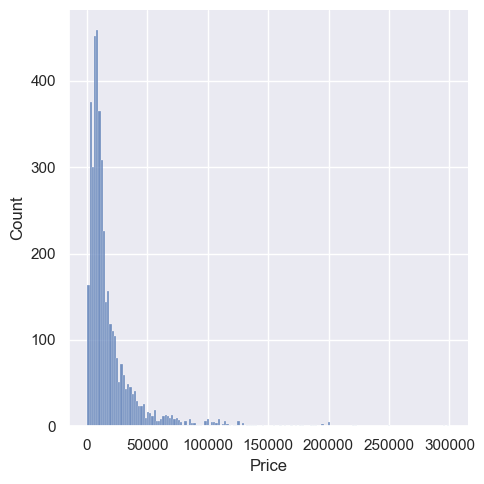

In [7]:
sns.displot(df1.Price)

In [8]:
# from the above plot, we have too many outliers so i have to drop the top 1% since the max value is 300000
# mean is 19552 but the median is 115000
# ths means some huge values are pulling the mean making the plot tilt to a direction

dealing with outliers

In [9]:
# this eliminates the top 1% of prices and mileage
q = df1.Price.quantile(0.99)
q1 = df1.Mileage.quantile(0.99)

In [10]:
df2=df1[df1['Price']<q]
df3=df2[df2['Mileage']<q1]

In [11]:
df2.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,4131,4131.000000,4131,4131.000000,3983.000000,4131,4131,4131.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,908,NaN,1597,NaN,NaN,1895,3737,NaN
mean,NaN,17736.684812,NaN,165.622125,2.743204,NaN,NaN,2006.281288
std,NaN,18862.421137,NaN,104.213992,4.956550,NaN,NaN,6.663535
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,6900.000000,NaN,93.000000,1.800000,NaN,NaN,2002.000000
50%,NaN,11300.000000,NaN,160.000000,2.200000,NaN,NaN,2007.000000
75%,NaN,21000.000000,NaN,230.000000,3.000000,NaN,NaN,2011.000000


In [12]:
df3.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,4088,4088.000000,4088,4088.000000,3944.000000,4088,4088,4088.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,895,NaN,1579,NaN,NaN,1866,3697,NaN
mean,NaN,17817.635753,NaN,161.649217,2.746851,NaN,NaN,2006.371820
std,NaN,18896.159502,NaN,96.248405,4.980291,NaN,NaN,6.591526
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,6999.000000,NaN,92.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11499.500000,NaN,158.000000,2.200000,NaN,NaN,2007.000000
75%,NaN,21000.000000,NaN,230.000000,3.000000,NaN,NaN,2011.000000


In [13]:
# EngineV should not be more than 6.5
df4=df3[df3['EngineV']<6.5]
df4.describe(include='all' )

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,3921,3921.000000,3921,3921.000000,3921.000000,3921,3921,3921.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,862,NaN,1499,NaN,NaN,1818,3559,NaN
mean,NaN,17957.020648,NaN,161.390972,2.442731,NaN,NaN,2006.401173
std,NaN,18959.522137,NaN,96.136165,0.945343,NaN,NaN,6.595800
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,7000.000000,NaN,92.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11500.000000,NaN,158.000000,2.200000,NaN,NaN,2007.000000
75%,NaN,21500.000000,NaN,229.000000,3.000000,NaN,NaN,2012.000000


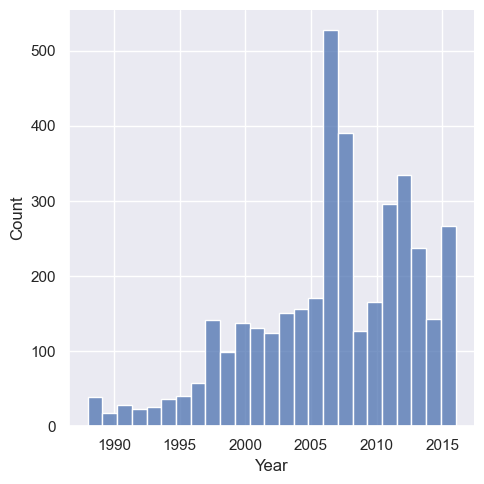

In [14]:
q3 = df4.Year.quantile(0.01)
df5=df4[df4['Year']>q3]
sns.displot(df5.Year)

Set index

In [15]:
df6=df5.reset_index(drop=True)
df6.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,3867,3867.000000,3867,3867.000000,3867.000000,3867,3867,3867.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,848,NaN,1467,NaN,NaN,1807,3505,NaN
mean,NaN,18162.616527,NaN,160.655288,2.449664,NaN,NaN,2006.704939
std,NaN,19003.107456,NaN,95.703315,0.948508,NaN,NaN,6.104037
min,NaN,800.000000,NaN,0.000000,0.600000,NaN,NaN,1988.000000
25%,NaN,7200.000000,NaN,91.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11700.000000,NaN,157.000000,2.200000,NaN,NaN,2008.000000
75%,NaN,21650.000000,NaN,225.500000,3.000000,NaN,NaN,2012.000000


Checking for OLS assumptions

plot price against year,
plot price against mileage,
plot price against engineV

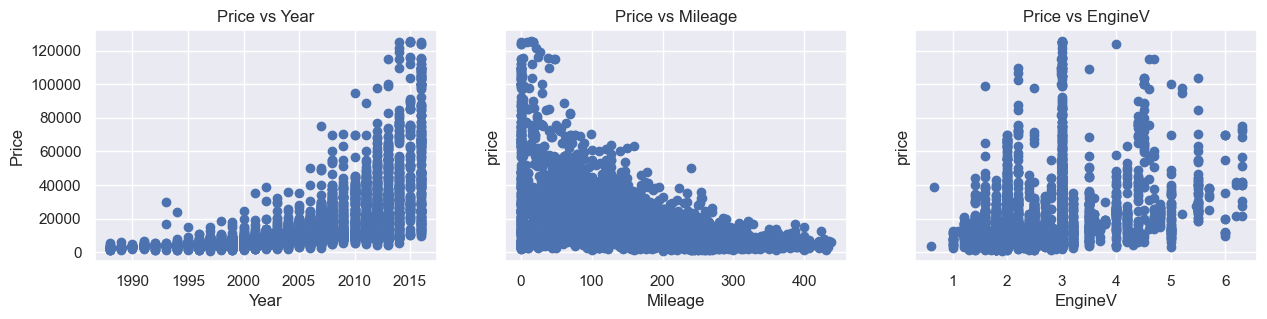

In [16]:
fig, axes = plt.subplots(1, 3, sharey = True,figsize=(15, 3))

# Price vs Year
axes[0].scatter(df6['Year'], df6['Price'])
axes[0].set_title('Price vs Year')
axes[0].set_xlabel('Year')
axes[0].set_ylabel('Price')

# Price vs Mileage
axes[1].scatter(df6['Mileage'], df6['Price'])
axes[1].set_title('Price vs Mileage')
axes[1].set_xlabel('Mileage')
axes[1].set_ylabel('price')

# Price vs EngineV
axes[2].scatter(df6['EngineV'], df6['Price'])
axes[2].set_title('Price vs EngineV')
axes[2].set_xlabel('EngineV')
axes[2].set_ylabel('price')
plt.show()


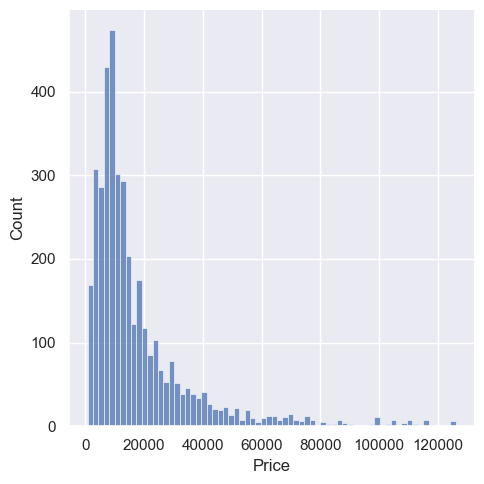

In [17]:
sns.displot(df6.Price)

Relaxing the assumptions

In [18]:
#using logarithm to convert from exponential to linear
log_price = np.log(df6['Price'])
df6['log_price']=log_price
df6

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,log_price
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,8.342840
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,8.974618
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,9.495519
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,10.043249
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,9.814656
...,...,...,...,...,...,...,...,...,...
3862,Volkswagen,11500.0,van,163,2.5,Diesel,yes,2008,9.350102
3863,Toyota,17900.0,sedan,35,1.6,Petrol,yes,2014,9.792556
3864,Mercedes-Benz,125000.0,sedan,9,3.0,Diesel,yes,2014,11.736069
3865,BMW,6500.0,sedan,1,3.5,Petrol,yes,1999,8.779557


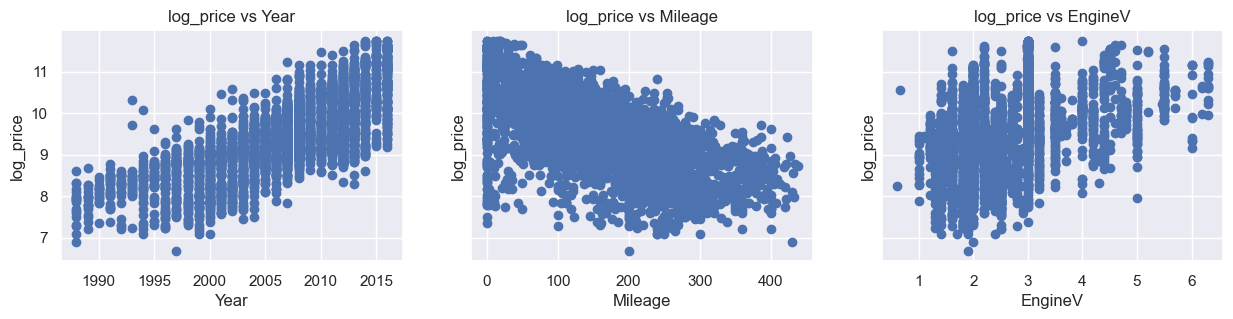

In [19]:
fig, axes = plt.subplots(1, 3, sharey = True,figsize=(15, 3))

# log_price vs Year
axes[0].scatter(df6['Year'], df6['log_price'])
axes[0].set_title('log_price vs Year')
axes[0].set_xlabel('Year')
axes[0].set_ylabel('log_price')

# log_price vs Mileage
axes[1].scatter(df6['Mileage'], df6['log_price'])
axes[1].set_title('log_price vs Mileage')
axes[1].set_xlabel('Mileage')
axes[1].set_ylabel('log_price')

# log_price vs EngineV
axes[2].scatter(df6['EngineV'], df6['log_price'])
axes[2].set_title('log_price vs EngineV')
axes[2].set_xlabel('EngineV')
axes[2].set_ylabel('log_price')
plt.show()

Check the correlation(i can see that EngineV and Mileage have less correlation)

In [20]:

df6[['Mileage','Year','EngineV',]].corr()

#VIF is better for multicollinearity check
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif= pd.DataFrame()
vif["VIF"] = [variance_inflation_factor(df6[['Mileage','Year','EngineV',]].values, i) for i in range(df6[['Mileage','Year','EngineV',]].shape[1])]
vif["features"] = df6[['Mileage','Year','EngineV',]].columns
vif


,VIF,features
0,3.791488,Mileage
1,10.355619,Year
2,7.669947,EngineV


Getting dummy variables

In [21]:
df7=df6.drop(['Year','Price'],axis =1)
df8 = pd.get_dummies(df7,drop_first=True)
df8.columns.values

array(['Mileage', 'EngineV', 'log_price', 'Brand_BMW',
       'Brand_Mercedes-Benz', 'Brand_Mitsubishi', 'Brand_Renault',
       'Brand_Toyota', 'Brand_Volkswagen', 'Body_hatch', 'Body_other',
       'Body_sedan', 'Body_vagon', 'Body_van', 'Engine Type_Gas',
       'Engine Type_Other', 'Engine Type_Petrol', 'Registration_yes'],
      dtype=object)

In [22]:
#Rearrange columns by bringing log price to the beginning
cols = ['log_price', 'Mileage', 'EngineV', 'Brand_BMW',
       'Brand_Mercedes-Benz', 'Brand_Mitsubishi', 'Brand_Renault',
       'Brand_Toyota', 'Brand_Volkswagen', 'Body_hatch', 'Body_other',
       'Body_sedan', 'Body_vagon', 'Body_van', 'Engine Type_Gas',
       'Engine Type_Other', 'Engine Type_Petrol', 'Registration_yes']



In [23]:
df9=df8[cols]
df9

,log_price,Mileage,EngineV,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
0,8.342840,277,2.0,True,False,False,False,False,False,False,False,True,False,False,False,False,True,True
1,8.974618,427,2.9,False,True,False,False,False,False,False,False,False,False,True,False,False,False,True
2,9.495519,358,5.0,False,True,False,False,False,False,False,False,True,False,False,True,False,False,True
3,10.043249,240,4.2,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True
4,9.814656,120,2.0,False,False,False,False,True,False,False,False,False,False,False,False,False,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3862,9.350102,163,2.5,False,False,False,False,False,True,False,False,False,False,True,False,False,False,True
3863,9.792556,35,1.6,False,False,False,False,True,False,False,False,True,False,False,False,False,True,True
3864,11.736069,9,3.0,False,True,False,False,False,False,False,False,True,False,False,False,False,False,True
3865,8.779557,1,3.5,True,False,False,False,False,False,False,False,True,False,False,False,False,True,True


LinearRegression

In [24]:
# Declare the input and output variables for the model
target = df9['log_price']
features = df9.drop(['log_price'],axis=1)

#Scale the features
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(features)
scaled_features = scaler.transform(features)

Train Test Split

In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(scaled_features, target, test_size=0.2, random_state=365)  

Creating the regression

In [26]:
reg = LinearRegression()
reg.fit(X_train,y_train)

LinearRegression()

In [27]:
#y_hat is the predicted values
y_hat = reg.predict(X_train)
reg.score(X_train, y_train)

0.748598450692507

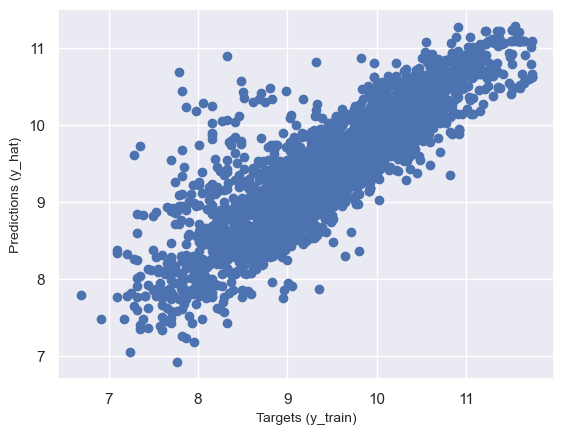

In [28]:
plt.scatter(y_train,y_hat)
plt.xlabel('Targets (y_train)',size=10)
plt.ylabel('Predictions (y_hat)',size=10)  
plt.show()

Text(0.5, 1.0, 'Distribution of Residuals')

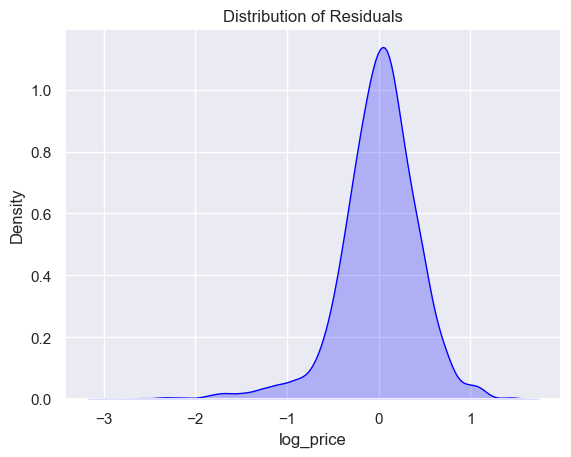

In [29]:
#To check for normal distribution
sns.kdeplot(y_train - y_hat, fill=True, color="blue",)
plt.title("Distribution of Residuals")

Weights and Bias (coefficient and intercept)

In [30]:
reg_summary=pd.DataFrame([features.columns,reg.coef_]).T
reg_summary.columns=['Features','Coefficients']
reg_summary

# A positive coefficient means that as the feature increases, the target variable also increases.
# A negative coefficient means that as the feature increases, the target variable decreases.
# if the brand is positive, then the price is higher than the base brand (Audi) since audi is the benchmark
# BMW and Mercedes are more expensive than audi
# Toyota, Mitsubishi, Renault and Volkswagen are cheaper than audi
# hatch, sedan, vagon and van are all cheaper than suv (base body type)


,Features,Coefficients
0,Mileage,-0.463322
1,EngineV,0.217812
2,Brand_BMW,0.019597
3,Brand_Mercedes-Benz,0.009958
4,Brand_Mitsubishi,-0.136239
5,Brand_Renault,-0.174562
6,Brand_Toyota,-0.061597
7,Brand_Volkswagen,-0.089915
8,Body_hatch,-0.137427
9,Body_other,-0.094462


Testing

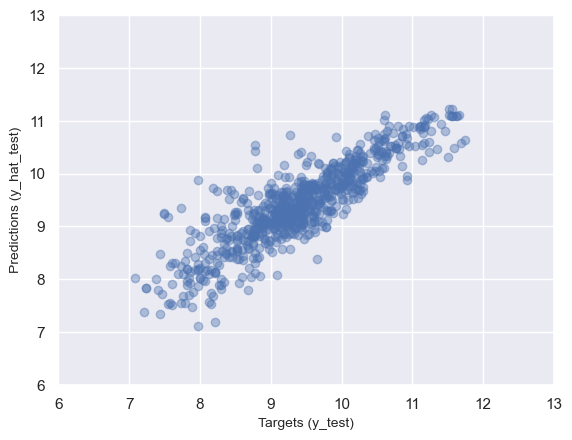

In [35]:
y_hat_test = reg.predict(X_test)
plt.scatter(y_test,y_hat_test,alpha=0.4)
plt.xlabel('Targets (y_test)',size=10)
plt.ylabel('Predictions (y_hat_test)',size=10) 
plt.xlim(6,13)
plt.ylim(6,13)
plt.show()

In [ ]:
#create a dataframe to compare the actual values and predicted values
df_comp = pd.DataFrame(np.exp(y_hat_test),columns=['Predicted Price'])
df_comp['Actual Price'] = np.exp(y_test)
df_comp['Residuals'] = df_comp['Actual Price'] - df_comp['Predicted Price'] 
y_test=y_test.reset_index(drop=True)


,Predicted Price,Actual Price,Residuals
0,11864.595115,7300.0,-4564.595115
1,3547.291219,2800.0,-747.291219
2,7420.620479,7500.0,79.379521
3,7571.823439,6400.0,-1171.823439
4,5830.643829,7800.0,1969.356171
...,...,...,...
769,5189.645542,2999.0,-2190.645542
770,10843.647035,9600.0,-1243.647035
771,14160.525630,18300.0,4139.474370
772,37406.381278,62000.0,24593.618722


In [46]:
df_comp['Residuals']=df_comp['Actual Price'] - df_comp['Predicted Price']
df_comp['difference %'] = (df_comp['Residuals']/df_comp['Actual Price'])*100
df_comp


,Predicted Price,Actual Price,Residuals,difference %
0,11864.595115,7300.0,-4564.595115,-62.528700
1,3547.291219,2800.0,-747.291219,-26.688972
2,7420.620479,7500.0,79.379521,1.058394
3,7571.823439,6400.0,-1171.823439,-18.309741
4,5830.643829,7800.0,1969.356171,25.248156
...,...,...,...,...
769,5189.645542,2999.0,-2190.645542,-73.045867
770,10843.647035,9600.0,-1243.647035,-12.954657
771,14160.525630,18300.0,4139.474370,22.620079
772,37406.381278,62000.0,24593.618722,39.667127


In [48]:
df_comp.describe()

,Predicted Price,Actual Price,Residuals,difference %
count,774.000000,774.000000,774.000000,774.000000
mean,16144.865327,17770.771214,1625.905887,-13.800487
std,13165.600735,19125.480295,10104.186492,67.132065
min,1235.145214,1200.000000,-35183.067807,-569.474196
25%,7924.296344,6900.000000,-2221.396340,-25.213000
50%,11806.604277,11500.000000,-83.344320,-0.796908
75%,19395.518185,20974.250000,3197.223740,21.413704
max,75518.067835,126000.000000,84203.192098,71.926413


In [49]:
df_comp.sort_values(by='difference %')  

,Predicted Price,Actual Price,Residuals,difference %
723,19414.751671,2900.0,-16514.751671,-569.474196
451,37784.076207,6500.0,-31284.076207,-481.293480
162,10449.669989,1800.0,-8649.669989,-480.537222
532,10270.126225,1800.0,-8470.126225,-470.562568
179,33685.063403,6500.0,-27185.063403,-418.231745
...,...,...,...,...
234,35621.482888,107000.0,71378.517112,66.708894
436,41796.807902,126000.0,84203.192098,66.827930
560,39247.028996,119000.0,79752.971004,67.019303
495,30293.698225,99000.0,68706.301775,69.400305
